# Graphs Used in Final Presentation

In [1]:
import GraphsKey as GraphsKey
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import GraphsKey
import numpy as np
import FilterGrids
import Reflected_Spectra_grid as Reflected_Spectra
import PICASO_Climate_grid
import Photochem_grid
import OptimizeReflectedLightSpectrum as Optimize
import matplotlib.pyplot as plt
import h5py

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import copy
import pandas as pd

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

import pickle

from itertools import cycle
import matplotlib.colors as mcolors

# Plot Photochemical Model in 3-Iterations (something w/ naturally matching cloud):
1. With PT Profile
2. With photochemical part of the profile
3. With Clouds 

With this one I want to do the best match with all cases on the grid, full spectrum:
- 0.1x solar total flux
- 0.5x solar metallicity (log)
- 110K total internal temperature
- 10^5 cm^2/s kzz value
- 0.725 radians

In [3]:
## Archean Earth
df_mol_archean_earth = {
        "N2":0.945,
        "CO2":0.05,
        "CO":0.0005,
        "CH4":0.005, 
        "H2O":0.003
    }

res_archean_earth = Reflected_Spectra.make_case_earth(df_mol_earth=df_mol_archean_earth)

    pressure  temperature     N2   CO2      CO    CH4    H2O
0   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
1   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
2   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
3   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
4   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
..       ...          ...    ...   ...     ...    ...    ...
85  0.537449   262.910544  0.945  0.05  0.0005  0.005  0.003
86  0.627701   270.360248  0.945  0.05  0.0005  0.005  0.003
87  0.733109   278.021043  0.945  0.05  0.0005  0.005  0.003
88  0.856218   285.898910  0.945  0.05  0.0005  0.005  0.003
89  1.000000   294.000000  0.945  0.05  0.0005  0.005  0.003

[90 rows x 7 columns]


In [4]:
wv_archean = res_archean_earth['all'][0]
fpfs_archean = res_archean_earth['all'][1]
alb_archean = res_archean_earth['all'][2]

In [5]:
def plot_PT_Photochem(total_flux=None, planet_metal=None, tint=None, kzz=None, phase=None, calc_PT=True, calc_PhotCh=True, calc_RSM=False):
    
    PT_list, sol_dict, soleq_dict, wno, albedo, fpfs, PT_list_Photochem = GraphsKey.find_all_plotting_values(total_flux=total_flux, planet_metal=planet_metal, tint=tint, kzz=kzz, phase=phase, calc_PT=calc_PT, calc_PhotCh=calc_PhotCh, calc_RSM=calc_RSM)
    
    # Plot the Composition from Photochem
    fig, ax1 = plt.subplots(1,1,figsize=[8,6])
    #species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
    species_sol = ['CO2_sol','H2O_sol','CH4_sol','CO_sol','NH3_sol','H2_sol','HCN_sol','H2Oaer_sol']
    species_soleq = ['CO2_soleq','H2O_soleq','CH4_soleq','CO_soleq','NH3_soleq','H2_soleq','HCN_soleq','H2Oaer_soleq']
    
    #for i,sp in enumerate(species):
    #    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
    #    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    
    #for i,sp in enumerate(species_soleq):
    #    ax1.plot(soleq_dict[sp],soleq_dict['pressure_soleq']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    #for i,sp in enumerate(species_sol):
    #    ax1.plot(sol_dict[sp],sol_dict['pressure_sol']/1e6, c='C'+str(i), label=sp.rstrip('_sol'))
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(1e-8,1)
    ax1.set_ylim(1e+3,1e-6)
    ax1.grid(alpha=0.4)
    ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
    ax1.set_xlabel('Mixing Ratio', fontsize=16)
    ax1.set_ylabel('Pressure (bar)', fontsize=16)
    #ax1.set_yticks(10.0**np.arange(-6,2))
    ax1.tick_params(axis='x', labelsize=16) 
    ax1.tick_params(axis='y', labelsize=16)
    #ax1.text(0.02, 1.04, 't = '+'%.2e'%pc.wrk.tn, \
    #    size = 15,ha='left', va='bottom',transform=ax1.transAxes)
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Temperature (K)', fontsize=16)
    ax2.set_xlim(0, 2000)
    ax2.tick_params(axis='x', labelsize=16)
    #print(((PT_list_Photochem[1])/(10**6)),  PT_list_Photochem[0])
    #print(np.flip(PT_list[1]), np.flip(PT_list[0]))
    #ax2.invert_yaxis()
    ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(10**6)), c='blue', ls='--',label='PT Photochem Profile')
    
    plt.title('K2-18b Around Sun (G-Star)', fontsize=20)
    
    #plt.legend()
    
    # Save the plot as a PNG image
    plt.tight_layout()
    plt.savefig('AllCaseMatch_EX_with_PT_Photochem.png')
    
    plt.show()
    
    # Close the plot to free up memory (important if you're generating many plots)
    # plt.close()

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)


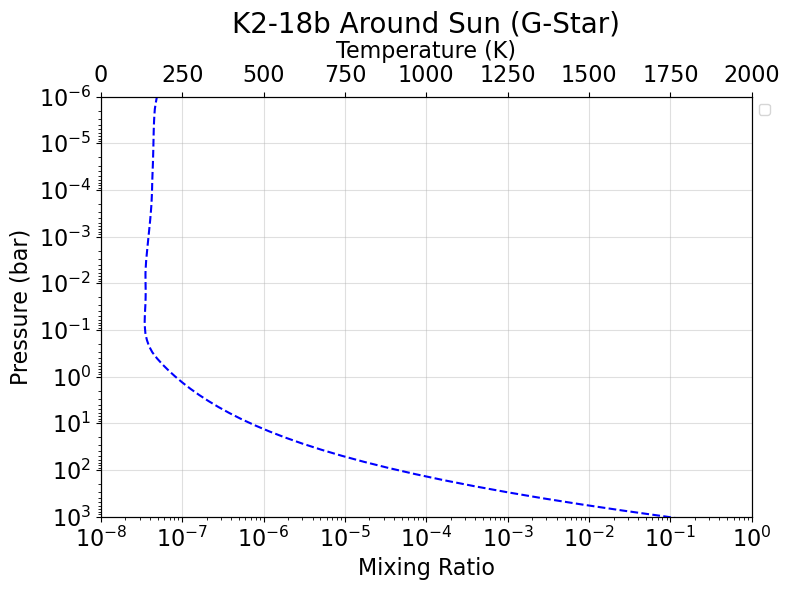

In [6]:
plot_PT_Photochem(total_flux=.1, planet_metal=0.5, tint=110, kzz=5)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
<class 'dict'>
[0.1, 0.5, 110.0, 5.0, 0.725]
0.1 0.5 100 5 0.6981317007977318
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [0.1, 0.5, 100, 5, 0.6981317007977318], did have clouds.
True
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsola

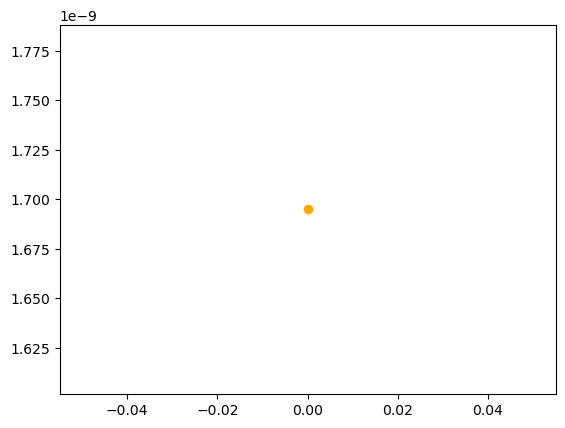

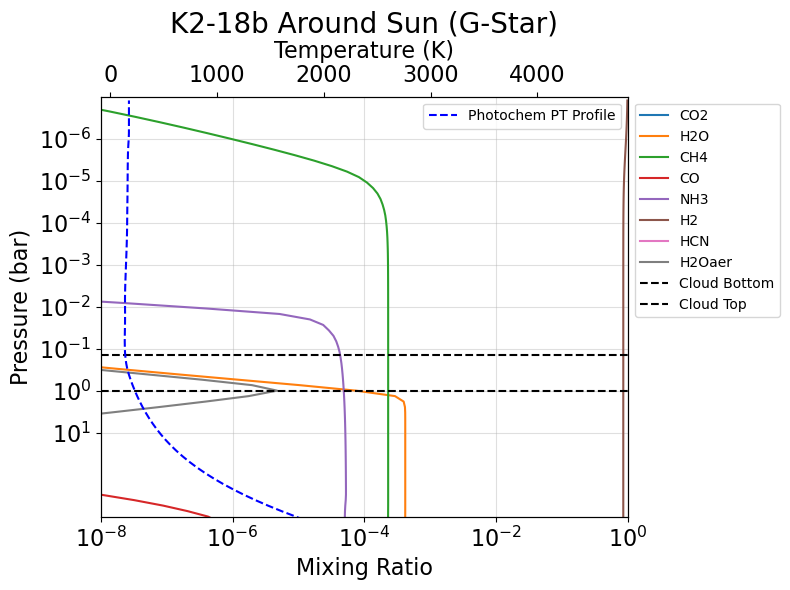

In [7]:
fpfs_dict_archean = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=[5], total_flux_list=[0.1], planet_metal_list=[0.5], tint_list=[110], kzz_list=[5], phase_list=[0.725])
print(type(fpfs_dict_archean))
minNep_inputs_archean, fpfs_values_min_archean, index_min_archean = Optimize.graph_vec_norm_fpfs(fpfs_dict=fpfs_dict_archean, 
                                                                                                 tol=1.695e-9, full_plot=False)
Optimize.plot_photochem_model_with_cloud(minNep_inputs=minNep_inputs_archean)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)


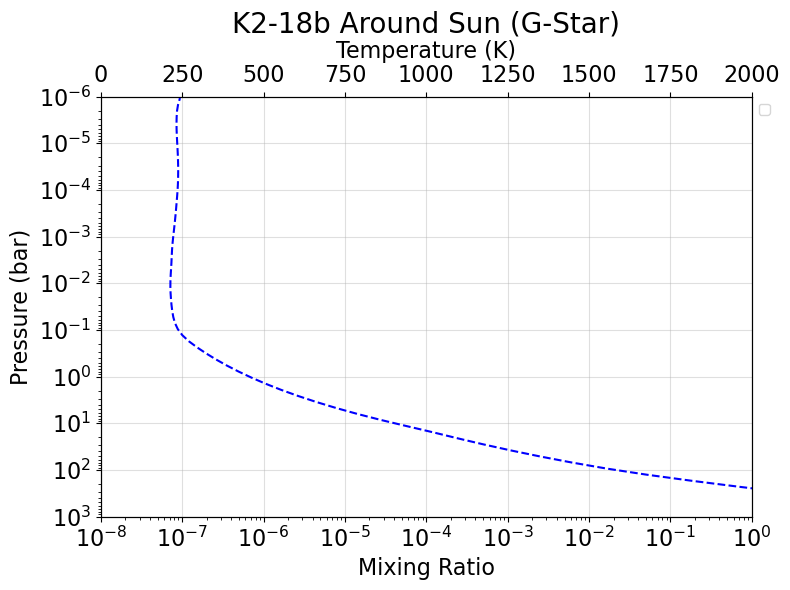

In [8]:
plot_PT_Photochem(total_flux=.915, planet_metal=0.5, tint=155, kzz=5)

In [9]:
## Plot graph with cloud

In [10]:
def plot_Reflected_Spectra(total_flux=None, planet_metal=None, tint=None, kzz=None, phase=None, calc_PT=False, calc_PhotCh=False, calc_RSM=True):

    PT_list, sol_dict, soleq_dict, wno, albedo, fpfs, PT_list_Photochem = GraphsKey.find_all_plotting_values(total_flux=total_flux, planet_metal=planet_metal, tint=tint, kzz=kzz, phase=phase, calc_PT=calc_PT, calc_PhotCh=calc_PhotCh, calc_RSM=calc_RSM)

    fig,ax = plt.subplots(1,1,figsize=[10,4])

    ax.plot(1e4/wno, fpfs, c='red', lw=1.5, ls='--')
    #for key in res:
    #    if key == 'all':
    #        continue
    #    _, fpfs1 = res[key]
    #    ax.fill_between(1e4/wno,fpfs,fpfs1,label=key,alpha=0.3)

    # Add lines to H2O and CH4 Molecular Absorption:
    y = np.linspace(0, 5e-10)
    x = [[0.6], [0.79], [0.89], [1.0], [1.1], [1.4], [1.7]]
    x_H2O = [[0.65], [0.72], [0.82], [0.94], [1.12], [1.4], [1.85]]

    for x_list in x:
        ax.plot(x_list*len(y), y, color='black', ls='--', label=f'CH4:{x_list}')
    for x_val in x_H2O:
        ax.plot(x_val*len(y), y, color='blue', ls='--', label=f'H2O:{x_val}')
    #wno_no_cloud_grid_150, fpfs_no_cloud_grid_150 = jdi.mean_regrid(wno_no_cloud, fpfs_no_cloud, R=150)
    ax.plot(1e4/wno, fpfs, c='red', lw=.05, ls='--')
    #ax.set_xlim(0.3,1)
    #ax.set_ylim(0e-10,10e-9)
    ax.set_ylabel('Planet-to-star flux ratio', fontsize=16)
    ax.set_xlabel('Wavelength (microns)', fontsize=16)
    ax.set_title('K2-18b Reflected Spectra around G-Star', fontsize=20)
    ax.tick_params(axis='x', labelsize=16) 
    ax.tick_params(axis='y', labelsize=16) 
    ax.legend()
    plt.tight_layout()
    plt.savefig('AllCaseMatch_ReflectedLightSpectraInd.png')
    #plt.savefig('old_opacities.pdf',bbox_inches='tight')
    plt.show()


Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)


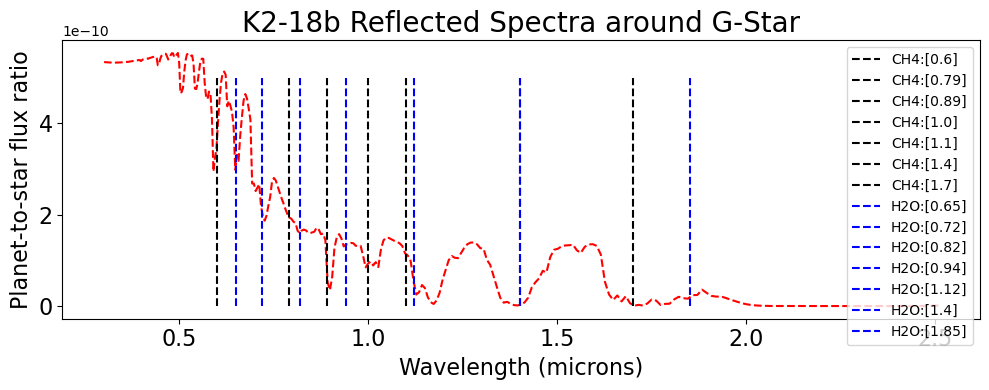

In [11]:
plot_Reflected_Spectra(total_flux=.1, planet_metal='0.5', tint=110, kzz=5, phase=0.725)

# Final Presentation Case (after the 3-iterations plot cases)
- 0.915x Solar Total Flux
- 0.5x Solar Metallicity (log)
- 155K total internal temperature
- 10^5 cm^2/s kzz value
- 2.175 radians of a phase
- Was the match found for being in the LUVOIR defined HZ

# Plot Photochemical Model in 2 Graphs:
1. Photochemical Model w/ cloud, comp, TP
2. Reflected Spectra compared to Archean Earth Phases but phases in degrees and rounded

In [12]:
total_flux_list = np.linspace(0.36, 1.1, 5)

In [13]:
fpfs_dict_archean_HZflux = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5, total_flux_list=total_flux_list)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A matc

In [14]:
minNep_inputs_archean_HZflux, fpfs_values_min_archean_HZflux, index_min_archean_HZflux = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_archean_HZflux)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


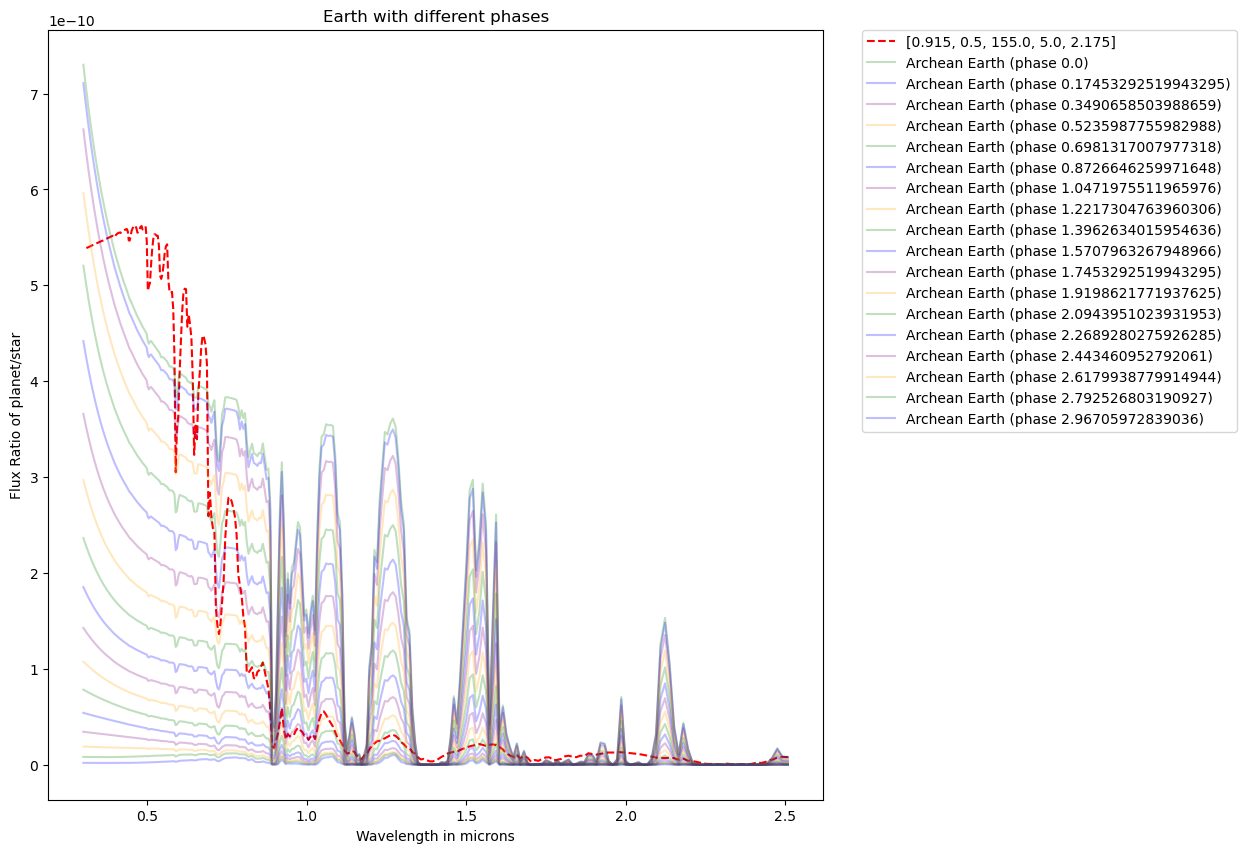

In [15]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_archean,
                                    minNep_inputs_float=[minNep_inputs_archean_HZflux], limit_input=None, type_earth='Archean')

In [16]:
# Altering the graph with multiple phases
def plot_RSM_earthphases(phase_earth, fpfs_earth, wv_earth, fpfs_minNep, wno_minNep, input_assos_minNep, type_earth='None', lim_earth_rang=None, lim_minNep_rang=None):

    print(f" This is the length right before plotting mini Neptunes: {len(wno_minNep), len(fpfs_minNep)}")
    
    # This creates a new plot for every input value used from the Mini Neptune Grid
    index = -1
 
    if lim_minNep_rang == None:
        for inputs in input_assos_minNep:
            index += 1
            plt.figure(figsize=(10,6))
            plt.title(f'Archean Earth vs MinNep HZ Fit', fontsize=20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            plt.xlabel(f'Wavelength in microns', fontsize=16)
            plt.ylabel(f'Flux Ratio of planet/star', fontsize=16)
            plt.plot(1e4/wno_minNep[index], fpfs_minNep[index], ls='--', marker='', color='red', label=f'MinNep:{inputs}')
            
            index_earth = np.linspace(0, len(phase_earth) - 1, len(phase_earth), dtype='int')
        
            # Define a list of colors or use a color cycle
            colors_2 = ['black', mcolors.CSS4_COLORS['teal'],
                     mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['steelblue'], 
                      mcolors.CSS4_COLORS['lightslategray'], 
                      mcolors.CSS4_COLORS['lightsteelblue'],mcolors.CSS4_COLORS['royalblue'],
                      mcolors.CSS4_COLORS['lavender'], mcolors.CSS4_COLORS['navy'], 
                      mcolors.CSS4_COLORS['blue'], mcolors.CSS4_COLORS['darkslateblue'], 
                     mcolors.CSS4_COLORS['rebeccapurple'], mcolors.CSS4_COLORS['darkviolet'], 
                     mcolors.CSS4_COLORS['violet'], mcolors.CSS4_COLORS['magenta'], 
                     mcolors.CSS4_COLORS['deeppink'], mcolors.CSS4_COLORS['lightcoral'], 
                     mcolors.CSS4_COLORS['brown'], mcolors.CSS4_COLORS['maroon']]

            colors = ['green', 'blue', 'purple', 'orange']
            color_cycler = cycle(colors) # For cycling through colors if more data sets than colors
        
        # This then plots a range of phases of Earth on top of the mini-Neptune.
            if lim_earth_rang == None:
                for index_earth in index_earth:
                    plt.plot(1e4/wv_earth[index_earth], fpfs_earth[index_earth], ls='-', marker='', color = next(color_cycler), alpha=0.25, label=f'Earth Phase:{phase_earth[index_earth]*(180/np.pi):.1f}') #f"{my_float:.2f}"
                    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
            else:
                for index_earth in index_earth[:lim_earth_rang]:
                    plt.plot(1e4/wv_earth[index_earth], fpfs_earth[index_earth], ls='-', marker='', color = next(color_cycler), alpha=0.25, label=f'Earth Phase:{phase_earth[index_earth]*(180/np.pi):.1f}')
                    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            plt.tight_layout()
            plt.savefig('LUVOIR_HZ_Match_Earthphases.png')

    elif lim_minNep_rang is not None:
        for inputs in input_assos_minNep[:lim_minNep_rang]:
            index += 1
            plt.figure(figsize=(8,6))
            plt.title(f'Earth with different phases')
            plt.xlabel(f'Wavelength in microns')
            plt.ylabel(f'Flux Ratio of planet/star')
            plt.plot(1e4/wno_minNep[index], fpfs_minNep[index], ls='--', marker='', color='red', label=f'{inputs}')
            
            index_earth = np.linspace(0, len(phase_earth) - 1, len(phase_earth), dtype='int')
        
            # Define a list of colors or use a color cycle
            colors_2 = ['black', mcolors.CSS4_COLORS['teal'],
                     mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['steelblue'], 
                      mcolors.CSS4_COLORS['lightslategray'], 
                      mcolors.CSS4_COLORS['lightsteelblue'],mcolors.CSS4_COLORS['royalblue'],
                      mcolors.CSS4_COLORS['lavender'], mcolors.CSS4_COLORS['navy'], 
                      mcolors.CSS4_COLORS['blue'], mcolors.CSS4_COLORS['darkslateblue'], 
                     mcolors.CSS4_COLORS['rebeccapurple'], mcolors.CSS4_COLORS['darkviolet'], 
                     mcolors.CSS4_COLORS['violet'], mcolors.CSS4_COLORS['magenta'], 
                     mcolors.CSS4_COLORS['deeppink'], mcolors.CSS4_COLORS['lightcoral'], 
                     mcolors.CSS4_COLORS['brown'], mcolors.CSS4_COLORS['maroon']]
            
            colors = ['green', 'blue', 'purple', 'orange']
            color_cycler = cycle(colors) # For cycling through colors if more data sets than colors
        
        # This then plots a range of phases of Earth on top of the mini-Neptune.
            if lim_earth_rang == None:
                for index_earth in index_earth:
                    plt.plot(1e4/wv_earth[index_earth], fpfs_earth[index_earth], ls='-', marker='', color = next(color_cycler), alpha=0.5, label=f'Earth Phase:{phase_earth[index_earth]*(180/np.pi):.1f}')
                    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
            else:
                for index_earth in index_earth[:lim_earth_rang]:
                    plt.plot(1e4/wv_earth[index_earth], fpfs_earth[index_earth], ls='-', marker='', color = next(color_cycler), alpha=0.5, label=f'Earth Phase:{phase_earth[index_earth]*(180/np.pi):.1f}')
                    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            plt.tight_layout()
            plt.savefig('LUVOIR_HZ_Match_Earthphases.png')

def graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=None, wv_earth_minNep=None, minNep_inputs_float=None, limit_input=30, type_earth='Modern'):

    # This function is specific to archean and modern Earth; this will change with alterations to the keys of the earth_diff_phases file.
    wv_archean_list = []
    fpfs_archean_list = []
    wv_modern_list = []
    fpfs_modern_list = []
    
    with open('earth_diff_phases.pkl', 'rb') as file:
        earth_dict = pickle.load(file)
        for phase in phase_earth:
            for key in list(earth_dict.keys()):
                if key.endswith(f'_{phase}'):
                    if key.startswith(f'Archean_wv_'):
                        wv_archean = earth_dict[key]
                        wv_archean_list.append(wv_archean)
                    if key.startswith(f'Archean_fpfs_'):
                        fpfs_archean = earth_dict[key]
                        fpfs_archean_list.append(fpfs_archean)
                    if key.startswith(f'Modern_wv_'):
                        wv_modern = earth_dict[key]
                        wv_modern_list.append(wv_modern)
                    if key.startswith(f'Modern_fpfs_'):
                        fpfs_modern = earth_dict[key]
                        fpfs_modern_list.append(fpfs_modern)
                    
    # This plots the reflected light spectra of the mini Neptune cases listed in minNep_inputs_float

    if type_earth=='Modern':
        fpfs_interpolated_minNep, wno_interpolated_minNep, input_assos_minNep = Optimize.restructure_objective_res(minNep_inputs_float=minNep_inputs_float, wv_earth=wv_earth_minNep)
        plot_RSM_earthphases(phase_earth=phase_earth, fpfs_earth=fpfs_modern_list, wv_earth=wv_modern_list, fpfs_minNep=fpfs_interpolated_minNep, wno_minNep=wno_interpolated_minNep, input_assos_minNep=input_assos_minNep, type_earth='Modern')
        
    elif type_earth=='Archean':
        fpfs_interpolated_minNep, wno_interpolated_minNep, input_assos_minNep = Optimize.restructure_objective_res(minNep_inputs_float=minNep_inputs_float, wv_earth=wv_earth_minNep)
        plot_RSM_earthphases(phase_earth=phase_earth, fpfs_earth=fpfs_archean_list, wv_earth=wv_archean_list, fpfs_minNep=fpfs_interpolated_minNep, wno_minNep=wno_interpolated_minNep, input_assos_minNep=input_assos_minNep, type_earth='Archean')
        
    else:
        print(f"Only available types of Earth for this function are Archean and Modern.")


Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


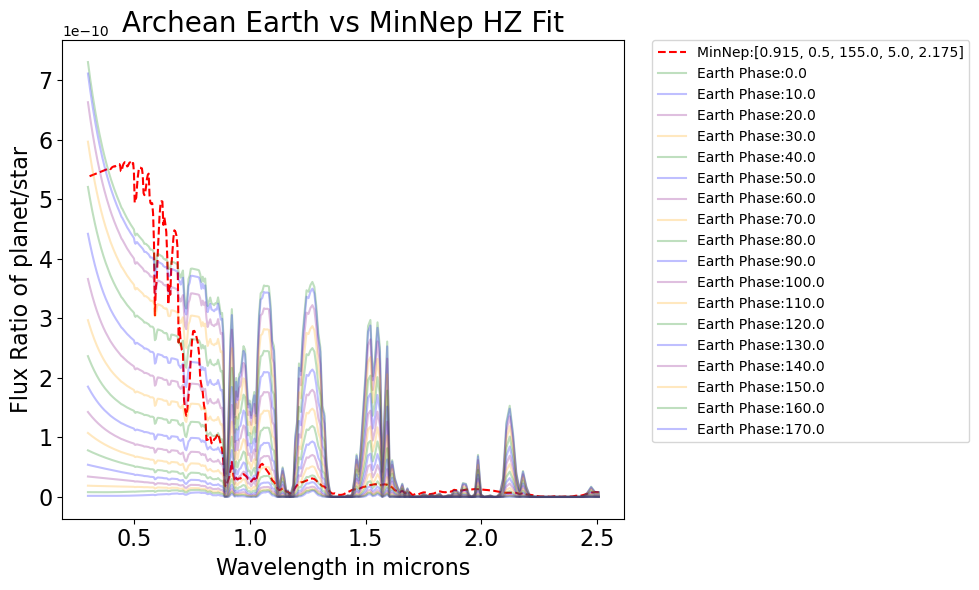

In [17]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_archean,
                                    minNep_inputs_float=[minNep_inputs_archean_HZflux], limit_input=None, type_earth='Archean')

### This is when limiting bins & wavelengths:

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
2 [16666.66666667 20000.        ]
16666.666666666668 3974.300807318192
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
2 [16666.66666667 20000.        ]
16666.666666666668 3974.300807318192
Make sure your inputs are within the following ranges, total_flux: 0.1 -

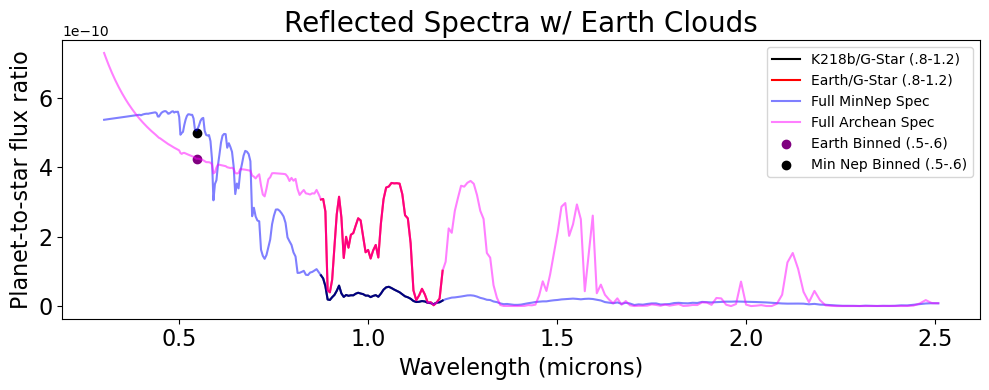

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 4))

fpfs_diff_dict, fpfs_wv_dict = Optimize.calc_objective_dict_point_wv_range(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5, total_flux_list=[0.915], 
                                                   planet_metal_list=[0.5], tint_list=[155], kzz_list=[5], phase_list=[2.175], 
                                                   bin_lim=[[.6, .5]], wv_lim=[[0.87, 1.2]])

interp = FilterGrids.find_ReflectedSpectra_sol(total_flux = 0.915, log10_planet_metallicity=0.5, tint=155, Kzz=5, phase=2.175)

ax1.plot(1e+4/(np.array(fpfs_wv_dict['wv_minNep_wv'][0])), fpfs_wv_dict['fpfs_minNep_wv'][0], c='k', lw=1.5, label='K218b/G-Star (.8-1.2)')
ax1.plot(1e+4/(np.array(fpfs_wv_dict['wv_earth_wv'])), fpfs_wv_dict['fpfs_earth_wv'], c='red', lw=1.5, label='Earth/G-Star (.8-1.2)')
ax1.plot(1e+4/interp['wno'], interp['fpfs'], c='blue', alpha=0.5, label='Full MinNep Spec')
ax1.plot(1e+4/fpfs_wv_dict['wv_earth_full'], fpfs_wv_dict['fpfs_earth_full'], c='magenta', alpha=0.5, label='Full Archean Spec')
ax1.scatter(1e+4/(np.array(fpfs_wv_dict['wv_earth_bin'])), np.array(fpfs_wv_dict['fpfs_earth_bin']), color='purple', label='Earth Binned (.5-.6)')
ax1.scatter(1e+4/(np.array(fpfs_wv_dict['wv_minNep_bin'])), np.array(fpfs_wv_dict['fpfs_minNep_bin']), color='black', label='Min Nep Binned (.5-.6)')
#ax1.plot(1e+4/(np.array(fpfs_wv_dict['wv_earth_bin_lim'])), np.array(fpfs_wv_dict['fpfs_earth_bin_lim']), color='cyan', label='Earth binned wv lim')
ax1.set_ylabel('Planet-to-star flux ratio', fontsize=16)
ax1.set_xlabel('Wavelength (microns)', fontsize=16)
ax1.tick_params(axis='x', labelsize=16) 
ax1.tick_params(axis='y', labelsize=16)
ax1.set_title('Reflected Spectra w/ Earth Clouds', fontsize=20)
ax1.legend()

plt.tight_layout()
plt.savefig("HZMatchReflectedSpectraClouds.png")

print((np.array(fpfs_wv_dict['wv_earth_bin'])))

In [20]:
with open("minNep_diffcld_params_smaller_vals.pkl", "rb") as file:
    messy_with_cld = pickle.load(file)
    print(messy_with_cld)

{'input': [0.915, 0.5, 155.0, 5.0, 2.175], 'pbot_cld': [[0.01, 0.01], [0.01, 0.05500000000000001], [0.01, 0.1], [5.005, 0.01], [5.005, 0.05500000000000001], [5.005, 0.1], [10.0, 0.01], [10.0, 0.05500000000000001], [10.0, 0.1]], 'clds': [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1,

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


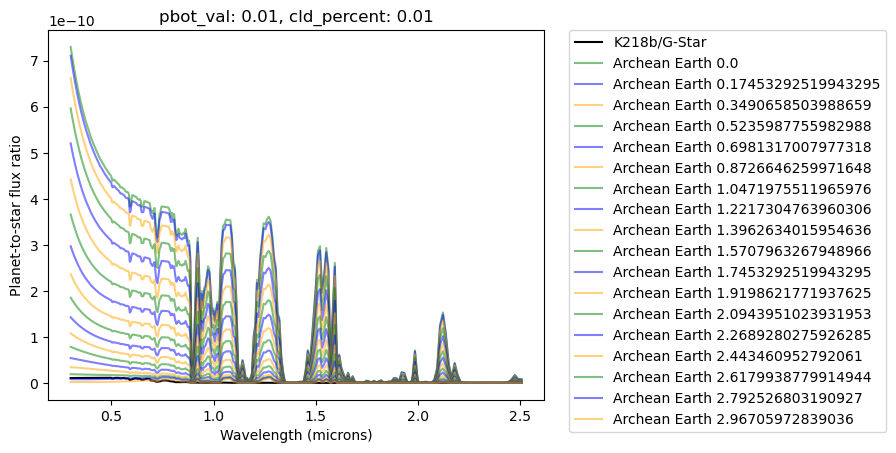

In [21]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_earth = phase_angle_list[:-1]

wv_archean_list = []    
fpfs_archean_list = []
wv_modern_list = []
fpfs_modern_list = []

with open('earth_diff_phases.pkl', 'rb') as file:
    earth_dict = pickle.load(file)
    for phase in phase_earth:
        for key in list(earth_dict.keys()):
            if key.endswith(f'_{phase}'):
                if key.startswith(f'Archean_wv_'):
                    wv_archean = earth_dict[key]
                    wv_archean_list.append(wv_archean)
                if key.startswith(f'Archean_fpfs_'):
                    fpfs_archean = earth_dict[key]
                    fpfs_archean_list.append(fpfs_archean)
                if key.startswith(f'Modern_wv_'):
                    wv_modern = earth_dict[key]
                    wv_modern_list.append(wv_modern)
                if key.startswith(f'Modern_fpfs_'):
                    fpfs_modern = earth_dict[key]
                    fpfs_modern_list.append(fpfs_modern)


index_earth = np.linspace(0, len(phase_earth) - 1, len(phase_earth), dtype='int')
print(index_earth)

index_minNep = np.linspace(0, len(list(messy_with_cld['pbot_cld'])) - 1, len(list(messy_with_cld['pbot_cld'])), dtype='int')
        
# Define a list of colors or use a color cycle
colors = ['green', 'blue', 'orange']
color_cycler = cycle(colors) # For cycling through colors if more data sets than colors

wv_earth = wv_archean_list
fpfs_earth = fpfs_archean_list

for index in index_minNep[::10]:
    wno = list(messy_with_cld['wno'])[index]
    fpfs = list(messy_with_cld['fpfs'])[index]
    pbot_val = list(messy_with_cld['pbot_cld'])[index][0]
    cld_percent = list(messy_with_cld['pbot_cld'])[index][1]
    fig, ax = plt.subplots()
    ax.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
    ax.set_ylabel('Planet-to-star flux ratio')
    ax.set_xlabel('Wavelength (microns)')
    ax.set_title(f'pbot_val: {pbot_val}, cld_percent: {cld_percent}')

    for index_earth_val in index_earth:
                        
        ax.plot(1e4/wv_archean_list[index_earth_val], fpfs_archean_list[index_earth_val], c=next(color_cycler), lw=1.5, alpha=0.5, label=f'Archean Earth {phase_earth[index_earth_val]}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
                

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import moviepy
from moviepy.editor import ImageClip, concatenate_videoclips

# 1. Generate and save figures
for i in index_minNep[:6]:
    wno = list(messy_with_cld['wno'])[i]
    fpfs = list(messy_with_cld['fpfs'])[i]
    pbot_val = list(messy_with_cld['pbot_cld'])[i][0]
    cld_percent = list(messy_with_cld['pbot_cld'])[i][1]
    fig, ax = plt.subplots()
    ax.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
    ax.set_ylabel('Planet-to-star flux ratio')
    ax.set_xlabel('Wavelength (microns)')
    ax.set_title(f'pbot_val: {pbot_val:.2f}, cld_percent: {cld_percent:.2f}', fontsize=20)
    ax.tick_params(axis='x', labelsize=16) 
    ax.tick_params(axis='y', labelsize=16)

    for index_earth_val in index_earth:
                        
        ax.plot(1e4/wv_archean_list[index_earth_val], fpfs_archean_list[index_earth_val], c=next(color_cycler), lw=1.5, alpha=0.5, label=f'Earth Phase:{(phase_earth[index_earth_val])*(180/np.pi):.2f}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()
    plt.savefig(f'figure_fraccld_{i+1}.png')
    plt.close()

# 2. Create video with transitions using MoviePy
image_paths = [f'figure_fraccld_{i+1}.png' for i in range(5)]
clips = []

for i, path in enumerate(image_paths):
    clip = ImageClip(path, duration=2) # Display each figure for 2 seconds
    #if i > 0:
        # Add a fade-in transition to the current clip
    #    clip = fadein(clip, duration=0.5)
    #if i < len(image_paths) - 1:
        # Add a fade-out transition to the previous clip (if it exists)
    #    if clips:
    #        clips[-1] = fadeout(clips[-1], duration=0.5)
    clips.append(clip)

final_clip = concatenate_videoclips(clips)
final_clip.write_videofile("figures_transition.mp4", fps=24) # Export as MP4

Moviepy - Building video figures_transition.mp4.
Moviepy - Writing video figures_transition.mp4



Moviepy - Done !
Moviepy - video ready figures_transition.mp4


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import moviepy
from moviepy.editor import ImageClip, concatenate_videoclips

i_list = []

# 1. Generate and save figures
for i in index_minNep[::20]:
    i_list.append(i)
    wno = list(messy_with_cld['wno'])[i]
    fpfs = list(messy_with_cld['fpfs'])[i]
    pbot_val = list(messy_with_cld['pbot_cld'])[i][0]
    cld_percent = list(messy_with_cld['pbot_cld'])[i][1]
    fig, ax = plt.subplots()
    ax.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
    ax.set_ylabel('Planet-to-star flux ratio')
    ax.set_xlabel('Wavelength (microns)')
    ax.set_title(f'pbot_val: {pbot_val:.2f}, cld_percent: {cld_percent:.2f}', fontsize=20)
    ax.tick_params(axis='x', labelsize=16) 
    ax.tick_params(axis='y', labelsize=16)

    for index_earth_val in index_earth:
                        
        ax.plot(1e4/wv_archean_list[index_earth_val], fpfs_archean_list[index_earth_val], c=next(color_cycler), lw=1.5, alpha=0.5, label=f'Earth Phase:{(phase_earth[index_earth_val])*(180/np.pi):.2f}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    print(f'complete')
    plt.tight_layout()
    plt.savefig(f'figure_cld_bot{i+1}.png')
    plt.close()

# 2. Create video with transitions using MoviePy
image_paths = [f'figure_cld_bot{i+1}.png' for i in i_list]
print(image_paths)
clips = []

for i, path in enumerate(image_paths):
    clip = ImageClip(path, duration=2) # Display each figure for 2 seconds
    #if i > 0:
        # Add a fade-in transition to the current clip
    #    clip = fadein(clip, duration=0.5)
    #if i < len(image_paths) - 1:
        # Add a fade-out transition to the previous clip (if it exists)
    #    if clips:
    #        clips[-1] = fadeout(clips[-1], duration=0.5)
    clips.append(clip)

final_clip = concatenate_videoclips(clips)
final_clip.write_videofile("figures_transition_cloudbottom.mp4", fps=24) # Export as MP4

complete
['figure_cld_bot1.png']
Moviepy - Building video figures_transition_cloudbottom.mp4.
Moviepy - Writing video figures_transition_cloudbottom.mp4



Moviepy - Done !
Moviepy - video ready figures_transition_cloudbottom.mp4
